# A DATA ANALYSIS OF TRAFFIC ACCIDENTS IN SEATTLE, WA
### Applied Data Science Capstone for the IBM Data Science Profissional Certificate/Coursera

Author: Marcelo Camera Oliveira


## Table of contents
* [1 - Business Understanding](#intro)
* [2 - The Data](#data)
* [3 - Methodology](#methodology)
* [4 - Analysis](#analysis)
* [5 - Results and Discussion](#results)
* [6 - Conclusion](#final)

## 1. Business Understanding  <a name="intro"></a>

The increasing number of cars on the roads brings with it a worrying reality: the increase of the accident rate. Such accidents cause enormous consequences, the most important of which, of a human nature, is the loss of life. Other effects appear in the ride of this reality, one of which is the financial loss, due to the long traffic jams and roadblocks, which have a negative impact on the logistics of goods.

In parallel, it is necessary to contextualize the importance of Information and Communication Technology (ICT) in solving urban problems. Given the worldwide technological advancement, cities are becoming increasingly “smart”. The terminology "Smart Cities" basically goes back to the concept of a city that makes use of ICT, through various physical devices connected to the IoT (Internet of Things) network, in order to optimize its operations and services, in addition to connecting citizens.

Faced with such a problem, it is suggested the development of a mathematical model that, in view of the knowledge of initial situations, a risk classification should be carried out. From this perspective, given the driver's entry into a certain road, he is given knowledge of the degree of risk to which he will be subject and, thus, the necessary preventive measures can be taken, such as: changing his route, reducing the car speed, or increasing your attention.

Thus, having the knowledge of historical accident data in a given location and the creation of a mathematical model based on this data, a city could use this tool to implement data capture devices (rain, traffic, object recognition on the roads) with the purpose of issuing alerts to the drivers (electronic boards, mobile phone applications, among others).

### 1.1 The Stakehoders

This project aims to inform Seattle city drivers (audience) about the conditions of the road he will be joining. In this way, he will be able to analyze the situation in order to take the necessary preventive measures.

## 2. The Data <a name="data"></a>

We will use the data of the City of Seattle Open Data Portal ([https://data.seattle.gov/](https://data.seattle.gov/)). This data contains several records of traffic accidents in the city of Seattle, USA, from 2004 to the present.

The dataset could be downloaded at: [https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions)  

The complete metadata for the data source can be found via [this link.](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

Analyzing the available data dictionary, with focus on the problem, we could see wich features we will really necessary. These were the chosen ones:

| ATTRIBUTE | DESCRIPTION |
| :---: | :---: |
| `OBJECTID` | unique record identifier; |
| `X` | Longitude - Geographic coordinate; |
| `Y` | Latitude - Geographic coordinate; |
| `ADDRTYPE` | Collision address type: Alley, Block or Intersection; |
| `LOCATION` | Description of the general location of the collision; |
| `SEVERITYCODE` | Target variable. Severity of the collision (3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown); |
| `SEVERITYDESC` | A detailed description of the severity of the collision |
| `COLLISIONTYPE` | Collision type; |
| `PERSONCOUNT` | The total number of people involved in the collision; |
| `PEDCOUNT` | The number of pedestrians involved in the collision; |
| `PEDCYLCOUNT` | The number of bicycles involved in the collision; |
| `VEHCOUNT` | The number of vehicles involved in the collision; |
| `INJURIES` | The number of total injuries in the collision; |
| `SERIOUSINJURIES` | The number of serious injuries in the collision; |
| `FATALITIES` | The number of fatalities in the collision; |
| `INCDTTM` | The date and time of the incident; |
| `JUNCTIONTYPE` | Category of junction at which collision took place; |
| `INATTENTIONIND` | Whether or not collision was due to inattention; |
| `UNDERINFL` | Whether or not a driver involved was under the influence of drugs or alcohol; |
| `WEATHER` | A description of the weather conditions during the time of the collision; |
| `ROADCOND` | The condition of the road during the collision; |
| `LIGHTCOND` | The light conditions during the collision; |
| `SPEEDING` | Whether or not speeding was a factor in the collision; |
| `HITPARKEDCAR` | Whether or not the collision involved hitting a parked car. |

The target variable will be the "SEVERITYCODE", which indicates the severity of the accident.

## 3. Methodology <a name="methodology"></a>

This is the main section of the project. Here, we will cover and describe the exploratory data analysis, inferential statistical testing and what machine learnings were used and why.

### 3.1 Data Collection

Let's import and load the data to a dataframe, with the attributes already chosen.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Downloading the data
!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-11-11 17:04:45--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 52.22.243.25, 3.213.168.69, 52.54.89.37, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|52.22.243.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘collisions.csv’

collisions.csv          [     <=>            ]  81.41M  87.2MB/s    in 0.9s    

2020-11-11 17:04:47 (87.2 MB/s) - ‘collisions.csv’ saved [85361869]



In [51]:
#Loading the data
chosen_attributes = ['OBJECTID','X','Y','ADDRTYPE','LOCATION','SEVERITYCODE','SEVERITYDESC',
                     'COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES',
                     'SERIOUSINJURIES','FATALITIES','INCDTTM','JUNCTIONTYPE','INATTENTIONIND',
                     'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR']
collisions_raw = pd.read_csv('collisions.csv', low_memory=False, usecols=chosen_attributes, parse_dates=['INCDTTM']) #loading the data with the features chosen and formating the 'INCDTTM' attribute to a date format.
print('Data loaded!')

Data loaded!


### 3.2 Understanding the Data

In [52]:
#Taking a look into the dataframe
collisions_raw.head()

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,FATALITIES,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,-122.315658,47.675815,1,Intersection,12TH AVE NE AND NE 65TH ST,2,Injury Collision,Pedestrian,2,1,...,0,2020-03-09 11:34:00,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,N
1,-122.316780,47.608643,2,Block,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,1,Property Damage Only Collision,Sideswipe,2,0,...,0,2013-03-27 14:02:00,Mid-Block (not related to intersection),NaN,N,Raining,Wet,Daylight,NaN,N
2,-122.344569,47.694547,3,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Injury Collision,Rear Ended,5,0,...,0,2013-03-29 14:47:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,N
3,-122.365999,47.691729,4,Block,8TH AVE NW BETWEEN NW 86TH ST AND NW 87TH ST,0,Unknown,NaN,0,0,...,0,2019-08-10 00:00:00,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Y
4,NaN,NaN,5,Block,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,1,Property Damage Only Collision,Other,1,0,...,0,2004-12-23 00:20:00,Mid-Block (not related to intersection),NaN,1,Clear,Dry,Dark - Street Lights On,NaN,N


In [53]:
collisions_raw.describe()

,X,Y,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
count,215093.000000,215093.000000,222581.000000,222581.000000,222581.000000,222581.000000,222581.000000,222581.000000,222581.000000,222581.000000
mean,-122.330753,47.620179,111291.000000,2.226659,0.038094,0.027352,1.729024,0.373918,0.015235,0.001716
std,0.030063,0.056079,64253.744471,1.468774,0.201664,0.164506,0.831112,0.731863,0.158012,0.045031
min,-122.425315,47.495573,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.349280,47.576979,55646.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,-122.330372,47.616033,111291.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,-122.311998,47.664291,166936.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,-122.238949,47.734142,222581.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000


In [54]:
collisions_raw.info()
print("\n The dataset has", collisions_raw.shape[0],"records and", collisions_raw.shape[1], "collumns (target variable and attributes).")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222581 entries, 0 to 222580
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X                215093 non-null  float64       
 1   Y                215093 non-null  float64       
 2   OBJECTID         222581 non-null  int64         
 3   ADDRTYPE         218858 non-null  object        
 4   LOCATION         217979 non-null  object        
 5   SEVERITYCODE     222580 non-null  object        
 6   SEVERITYDESC     222581 non-null  object        
 7   COLLISIONTYPE    195981 non-null  object        
 8   PERSONCOUNT      222581 non-null  int64         
 9   PEDCOUNT         222581 non-null  int64         
 10  PEDCYLCOUNT      222581 non-null  int64         
 11  VEHCOUNT         222581 non-null  int64         
 12  INJURIES         222581 non-null  int64         
 13  SERIOUSINJURIES  222581 non-null  int64         
 14  FATALITIES       222

### 3.3 Preliminary data preparation

In [55]:
#Checking if there are any missing values
collisions_raw.isna().sum().to_frame()

,0
X,7488
Y,7488
OBJECTID,0
ADDRTYPE,3723
LOCATION,4602
SEVERITYCODE,1
SEVERITYDESC,0
COLLISIONTYPE,26600
PERSONCOUNT,0
PEDCOUNT,0


The attributes "INATTENTIONIND" and "SPEEDING" attracts our attention. There are just a few registers of them: 9,982 registers for the "SPEEDING" attribute and 30,195 for the "INATTENTIONIND" atrribute. This amounts to of 4.5% and 13.5% of the data, respectively. Because of these few quantity of records, we choose to delete them.  

The others attributes has just a few missing data, so we will treat them later.

In [56]:
collisions_raw.drop(columns=['SPEEDING','INATTENTIONIND'], inplace=True) #dropping the attributes
print("\n The dataset has now", collisions_raw.shape[0],"records and", collisions_raw.shape[1], "collumns (target variable and attributes).")


 The dataset has now 222581 records and 22 collumns (target variable and attributes).


In [57]:
#Checking the unique values of some attributes just to see if we have something wrong.
for i in collisions_raw.columns:
    print(i, collisions_raw[i].unique(),'\n')

X [-122.31565805 -122.31677994 -122.34456926 ... -122.3392689  -122.28595855
 -122.35335875] 

Y [47.67581493 47.60864269 47.6945466  ... 47.66708309 47.71189454
 47.67604535] 

OBJECTID [     1      2      3 ... 222579 222580 222581] 

ADDRTYPE ['Intersection' 'Block' 'Alley' nan] 

LOCATION ['12TH AVE NE AND NE 65TH ST'
 '12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST'
 'AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST' ...
 'NE 115TH ST BETWEEN 39TH AVE NE AND 40TH AVE NE'
 'FRANCIS AVE N AND N 65TH ST' '42ND AVE S AND DEAD END 1'] 

SEVERITYCODE ['2' '1' '0' '2b' '3' nan] 

SEVERITYDESC ['Injury Collision' 'Property Damage Only Collision' 'Unknown'
 'Serious Injury Collision' 'Fatality Collision'] 

COLLISIONTYPE ['Pedestrian' 'Sideswipe' 'Rear Ended' nan 'Other' 'Parked Car'
 'Left Turn' 'Head On' 'Angles' 'Right Turn' 'Cycles'] 

PERSONCOUNT [ 2  5  0  1  3  4  6  7  8 11 16 12  9 17 26 13 22 37 10 36 28 14 19 53
 30 29 23 44 15 32 21 20 27 41 35 43 81 18 25 48 24 34 57 39 47 31 54 9

Now, it's importanting to correct the data of the "UNDERINFL" attribute. Let's transforming all the zero values to "N" and all of the ones values to "Y".

In [58]:
collisions_raw['UNDERINFL'].replace("0","N",inplace=True)
collisions_raw['UNDERINFL'].replace("1","Y",inplace=True)
collisions_raw['UNDERINFL'].unique()

array(['N', nan, 'Y'], dtype=object)

To expand our analysis, we will add columns for ther years and the months.

In [84]:
collisions_raw['YEAR']=collisions_raw['INCDTTM'].dt.year
collisions_raw['MONTH']=collisions_raw['INCDTTM'].dt.month
collisions_raw[['INCDTTM','MONTH','YEAR']].head(10)

,INCDTTM,MONTH,YEAR
0,2020-03-09 11:34:00,3,2020
1,2013-03-27 14:02:00,3,2013
2,2013-03-29 14:47:00,3,2013
3,2019-08-10 00:00:00,8,2019
4,2004-12-23 00:20:00,12,2004
5,2006-02-21 00:13:00,2,2006
6,2005-05-27 06:00:00,5,2005
7,2013-03-25 02:27:00,3,2013
8,2013-03-30 20:47:00,3,2013
9,2007-10-09 00:00:00,10,2007


Let's see how the data is distributed over time.

In [95]:
df_records_yr = collisions_raw[['YEAR','OBJECTID']].groupby(by=['YEAR']).count()
df_records_yr = df_records_yr.rename(columns={'OBJECTID': 'TOTAL_RECORDS'})
df_records_yr

,TOTAL_RECORDS
YEAR,
2003,1
2004,15457
2005,16016
2006,15794
2007,15082
2008,14139
2009,13275
2010,11958
2011,12417


There is only one record for the 2003 year. So we can delete this information.

In [91]:
collisions_raw.query('YEAR == "2003"')

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,FATALITIES,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,YEAR,MONTH
802,-122.320755,47.608073,803,Intersection,BROADWAY AND CHERRY ST,0,Unknown,NaN,0,0,...,0,2003-10-06,NaN,NaN,NaN,NaN,NaN,N,2003,10


In [117]:
collisions_raw = collisions_raw.query('YEAR != "2003"')
df_records_yr = df_records_yr.query('YEAR != "2003"')
print('Record deleted!')

Record deleted!


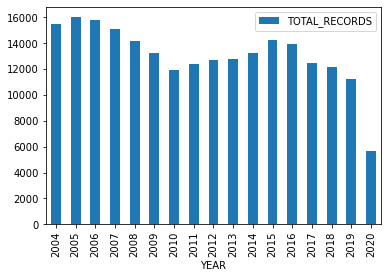

In [119]:
df_records_yr.plot(kind='bar')
plt.show()

In [127]:
print('Our first record is on:', collisions_raw['INCDTTM'].dt.date.min())
print('Our last record is on:', collisions_raw['INCDTTM'].dt.date.max())

Our first record is on: 2004-01-01
Our last record is on: 2020-11-04


That's the dataframe after the adjustments.

In [128]:
collisions_raw.head()

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,FATALITIES,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,YEAR,MONTH
0,-122.315658,47.675815,1,Intersection,12TH AVE NE AND NE 65TH ST,2,Injury Collision,Pedestrian,2,1,...,0,2020-03-09 11:34:00,At Intersection (intersection related),N,Clear,Dry,Daylight,N,2020,3
1,-122.316780,47.608643,2,Block,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,1,Property Damage Only Collision,Sideswipe,2,0,...,0,2013-03-27 14:02:00,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,N,2013,3
2,-122.344569,47.694547,3,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Injury Collision,Rear Ended,5,0,...,0,2013-03-29 14:47:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,2013,3
3,-122.365999,47.691729,4,Block,8TH AVE NW BETWEEN NW 86TH ST AND NW 87TH ST,0,Unknown,NaN,0,0,...,0,2019-08-10 00:00:00,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,Y,2019,8
4,NaN,NaN,5,Block,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,1,Property Damage Only Collision,Other,1,0,...,0,2004-12-23 00:20:00,Mid-Block (not related to intersection),Y,Clear,Dry,Dark - Street Lights On,N,2004,12


In [129]:
collisions_raw.describe()

,X,Y,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,YEAR,MONTH
count,215092.000000,215092.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000
mean,-122.330753,47.620179,111291.496397,2.226669,0.038094,0.027352,1.729032,0.373919,0.015235,0.001716,2011.363379,6.571619
std,0.030063,0.056080,64253.462014,1.468770,0.201665,0.164506,0.831105,0.731864,0.158012,0.045031,4.793374,3.421777
min,-122.425315,47.495573,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,1.000000
25%,-122.349280,47.576979,55646.750000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2007.000000,4.000000
50%,-122.330375,47.616033,111291.500000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2011.000000,7.000000
75%,-122.311998,47.664291,166936.250000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2015.000000,10.000000
max,-122.238949,47.734142,222581.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,2020.000000,12.000000


In [130]:
collisions_raw.info()
print("\n The dataset has", collisions_raw.shape[0],"records and", collisions_raw.shape[1], "collumns (target variable and attributes).")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222580 entries, 0 to 222580
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X                215092 non-null  float64       
 1   Y                215092 non-null  float64       
 2   OBJECTID         222580 non-null  int64         
 3   ADDRTYPE         218857 non-null  object        
 4   LOCATION         217978 non-null  object        
 5   SEVERITYCODE     222579 non-null  object        
 6   SEVERITYDESC     222580 non-null  object        
 7   COLLISIONTYPE    195981 non-null  object        
 8   PERSONCOUNT      222580 non-null  int64         
 9   PEDCOUNT         222580 non-null  int64         
 10  PEDCYLCOUNT      222580 non-null  int64         
 11  VEHCOUNT         222580 non-null  int64         
 12  INJURIES         222580 non-null  int64         
 13  SERIOUSINJURIES  222580 non-null  int64         
 14  FATALITIES       222

### 3.4 Exploratory Data Analysis



We will use the Cross-Industry Standard Process for Data Mining (CRISP-DM) which consist of the following steps:

1. **Business Understanding:** The initial phase is to understand the project's objective from the business or application perspective. We talked about it in section 1 of this project.

1. **Data understanding:** We discused this phase on the section 2 of this document. We downloaded the dataset, filtered the attributes (columns) and made some exploratory data analysis.

1. **Data Preparation:** The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

1. **Modeling:** In this phase, various algorithms and methods will be tested to build the model including supervised machine learning techniques. 

1. **Evaluation:** Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the application's objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others.

1. **Deployment:** The deployment phase requirements vary from project to project. It can be as simple as creating a report, developing interactive visualization, or making the machine learning model available in the production environment. **This step is out of scope of this project.**

### 3.1 Data Preparation

#### 3.1.2 Cleaning the data

In [ ]:
#Checking columns types and data shape
collisions.info()
print("\n The dataset has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

In [ ]:
#Checking how many missing values are there
collisions.isna().sum().to_frame()

In [ ]:
collisions_raw.dropna(inplace=True) #Deleting records with missing data

In [ ]:
#Checking the unique values of some attributes just to see if we have something wrong.
for i in collisions.columns:
    print(i, collisions[i].unique(),'\n')

In [ ]:
collisions['LIGHTCOND'].value_counts().to_frame()

In [ ]:
#Some attributes have values like "Unknown" or "Other" that do not help us. We will delete records that contain these values.
collisions = collisions.drop(collisions[(collisions['COLLISIONTYPE'] == "Other") | 
                                        (collisions['JUNCTIONTYPE'] == "Unknown") | 
                                        (collisions['WEATHER'] == "Other") | 
                                        (collisions['WEATHER'] == "Unknown") |
                                        (collisions['ROADCOND'] == "Other") | 
                                        (collisions['ROADCOND'] == "Unknown") |
                                        (collisions['LIGHTCOND'] == "Other") |
                                        (collisions['LIGHTCOND'] == "Unknown")].index)

#Fixing the attribute UNDERINFL for use only zeros and ones.

collisions['UNDERINFL'].replace("N","0",inplace=True)
collisions['UNDERINFL'].replace("Y","1",inplace=True)
collisions['UNDERINFL'] = collisions['UNDERINFL'].astype('int') #changing the attribute type for integer

#The information bellow is the same. Let's join then.
collisions['LIGHTCOND'] = collisions['LIGHTCOND'].replace("Dark - Street Lights Off", "Dark - No Street Lights")

#Dropping the 'Dark - Unknown Lighting' in attribute 'LIGHTCOND'. There are only a few records and this information doesnt help so much.
collisions = collisions.drop(collisions[(collisions['LIGHTCOND'] == "Dark - Unknown Lighting")].index)

for i in collisions.columns:
    print(i, collisions[i].unique(),'\n')

print("\n The dataset now has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

#### 3.1.3 Balancing the data

Our target variable is the attribute "SEVERITYCODE", which indicates the severity of the accident.  
In this datase we only have 2 types of severity: 1 - Property Damage Only Collision, 2 - Injury Collision.  
It's important to say that the attribute SEVERITYCODE is the same as the SEVERITYDESC. The only difference is that one is in numbers and the other is in categorical values.

In [ ]:
#Checking if the data is balanced
sns.countplot(x="SEVERITYDESC", data=collisions)
collisions['SEVERITYDESC'].value_counts()

As we could see above, there are twice as much "Property Damage Only Collision" data as "Injury Collision" data.  
This will causes a bias in the data results. So, we will need to equalize this data.

In [ ]:
#You should have to install the Imballanced library before.
!pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = collisions[['X','Y','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT',
                'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','JUNCTIONTYPE',
                'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
y = collisions[['SEVERITYCODE']]
rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X,y)

collisions = X_res
collisions['SEVERITYCODE'] = y_res

sns.countplot(x="SEVERITYDESC", data=collisions)
collisions['SEVERITYDESC'].value_counts()

Now the data is balanced and we can continue to the next step.

## 4 - Analysis <a name="analysis"></a>

In [ ]:
# [WORKING IN PROGRESS]
# perform some basic explanatory data analysis and derive some additional info from our raw data.

As we have already made some changes to the data set (we exclude bad records and balance the data), this analysis will not focus on making a complex understanding of the data.  
The purpose of this analysis is to identify the attributes that contribute to a satisfactory machine learning algorithm.

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="severity", data=colData, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="severity", data=colData, ax=axs[1, 0])
sns.countplot(y="JUNCTIONTYPE", hue="severity", data=colData, ax=axs[2, 0])
sns.countplot(y="WEATHER", hue="severity", data=colData, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="severity", data=colData, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="severity", data=colData, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="severity", data=colData, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="severity", data=colData, ax=axs[1, 2])
sns.countplot(y="INATTENTIONIND", hue="severity", data=colData, ax=axs[2, 2])


sns.countplot(x="SEVERITYDESC", data=collisions)


X = collisions[['X','Y','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT',
                'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','JUNCTIONTYPE',
                'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
y = collisions[['SEVERITYCODE']]

#### Analysing the attribute ADDRTYPE:

In [ ]:
sns.countplot(y="ADDRTYPE", hue="SEVERITYDESC", data=collisions)

In [ ]:
df_grouped_addrtype = collisions.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts().to_frame(name='TOTAL')
df_grouped_addrtype

There are almost twice accidents with property damage on blocks than intersections.  
The number of accidents with injury collision are similar for these two types of address type.

In [ ]:
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="UNDERINFL", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="WEATHER", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="ROADCOND", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="LIGHTCOND", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="", hue="SEVERITYDESC", data=collisions)

## 5 - Results and Discussion <a name="results"></a>

In [ ]:
# [WORKING IN PROGRESS]
# Results -> section where you discuss the results.
# Discussion -> section where you discuss any observations you noted and any recommendations you can make based on the results.

## 6 - Conclusion <a name="final"></a>

In [ ]:
# [WORKING IN PROGRESS]
# section where you conclude the report